In [68]:
# Capstone Two: Data Wrangling - Sentinel Fraud Detection

# === Data Collection ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Load dataset containing 1000 samples (100 fraud, 900 non-fraud), already filtered to TRANSFER and CASH_OUT only
df = pd.read_csv("../data/sentinel_sample_1000.csv")  # Ensure data is accessible in the relative directory

In [70]:
# === Data Definition ===
# Inspect the dataset structure, types, and quick overview
print("\nColumn Info:")
df.info()


Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            1000 non-null   int64  
 1   type            1000 non-null   object 
 2   amount          1000 non-null   float64
 3   nameOrig        1000 non-null   object 
 4   oldbalanceOrg   1000 non-null   float64
 5   newbalanceOrig  1000 non-null   float64
 6   nameDest        1000 non-null   object 
 7   oldbalanceDest  1000 non-null   float64
 8   newbalanceDest  1000 non-null   float64
 9   isFraud         1000 non-null   int64  
 10  isFlaggedFraud  1000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB


In [71]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              step        amount  oldbalanceOrg  newbalanceOrig  \
count  1000.000000  1.000000e+03   1.000000e+03    1.000000e+03   
mean     29.089000  3.459726e+05   1.629353e+05    1.808456e+04   
std      18.375547  7.543341e+05   7.606432e+05    9.793360e+04   
min       1.000000  1.190000e+02   0.000000e+00    0.000000e+00   
25%      15.000000  9.211811e+04   0.000000e+00    0.000000e+00   
50%      21.000000  1.776149e+05   1.312500e+03    0.000000e+00   
75%      41.000000  3.285459e+05   5.687894e+04    0.000000e+00   
max      95.000000  1.000000e+07   1.186101e+07    1.861008e+06   

       oldbalanceDest  newbalanceDest     isFraud  isFlaggedFraud  
count    1.000000e+03    1.000000e+03  1000.00000          1000.0  
mean     1.329236e+06    1.687451e+06     0.10000             0.0  
std      2.679604e+06    2.842580e+06     0.30015             0.0  
min      0.000000e+00    0.000000e+00     0.00000             0.0  
25%      5.989842e+04    2.772988e+

In [72]:
# Check the distribution of fraud vs. non-fraud
print("\nFraud Count:")
print(df['isFraud'].value_counts())


Fraud Count:
isFraud
0    900
1    100
Name: count, dtype: int64


In [73]:
# View fraud-only transactions to identify patterns
fraud_cases = df[df['isFraud'] == 1]
print("\nFraudulent Transactions:")
print(fraud_cases)


Fraudulent Transactions:
     step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
11     84  CASH_OUT    39379.45   C743472915       39379.45             0.0   
39     29  CASH_OUT   268641.82  C2038670336      268641.82             0.0   
41     69  CASH_OUT  5521483.54  C1786386487     5521483.54             0.0   
54     44  TRANSFER   387952.42   C374179954      387952.42             0.0   
55     93  TRANSFER    38150.22  C1961802855       38150.22             0.0   
..    ...       ...         ...          ...            ...             ...   
965    34  TRANSFER   428239.03   C711340026      428239.03             0.0   
983    85  CASH_OUT   167679.27  C2032147559      167679.27             0.0   
985     2  CASH_OUT   963532.14   C430329518      963532.14             0.0   
992    27  TRANSFER   494244.61  C1529468267      494244.61             0.0   
994    43  CASH_OUT    93459.89  C1250676021       93459.89             0.0   

        nameDest  oldbala

In [92]:
# === Data Cleaning ===
# Drop 'isFlaggedFraud' since it is always 0 and provides no useful signal
if 'isFlaggedFraud' in df.columns:
    df.drop(columns=['isFlaggedFraud'], inplace=True)

print(df.head())

   step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0    19  CASH_OUT  156435.77  C1306155018            0.0             0.0   
1     9  CASH_OUT  159022.13  C1970395543       100332.0             0.0   
2    35  CASH_OUT  281322.81   C870758580        11308.0             0.0   
3    38  CASH_OUT   63142.96  C2094408841            0.0             0.0   
4    41  CASH_OUT  370542.50   C730868144        10054.0             0.0   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0    C10389336       350075.23       329337.60        0  
1  C1875625456            0.00       159022.13        0  
2  C1388202553       107819.35       389142.16        0  
3   C221397311        73531.14       136674.10        0  
4   C849704466       281294.97       651837.47        0  


In [75]:
# Check for missing values and duplicates
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [76]:
print("\nNumber of duplicate rows:", df.duplicated().sum())
df_cleaned = df.copy()
print("\nShape after checking for duplicates:", df_cleaned.shape)


Number of duplicate rows: 0

Shape after checking for duplicates: (1000, 10)


In [94]:
# Examine most frequent senders
print("\nTop origin accounts by frequency:")
print(df_cleaned['nameOrig'].value_counts().head())

# Examine most frequent receivers
print("\nTop destination accounts by frequency:")
top_dests = df_cleaned['nameDest'].value_counts().head()
print(top_dests)


Top origin accounts by frequency:
nameOrig
C1306155018    1
C386112377     1
C1224553129    1
C1737902556    1
C1309517631    1
Name: count, dtype: int64

Top destination accounts by frequency:
nameDest
C1010737727    2
C174487779     2
C1931460274    2
C1708048606    2
C715094437     2
Name: count, dtype: int64


In [93]:
# Evaluate whether top destinations are linked to fraudulent transactions
fraud_cases = df_cleaned[df_cleaned['isFraud'] == 1]
fraud_dest_match = fraud_cases[fraud_cases['nameDest'].isin(top_dests.index)]
unique_fraud_dests = fraud_dest_match['nameDest'].nunique()
print("\nTop destination accounts involved in fraud:")
print(fraud_dest_match[['nameDest', 'amount', 'isFraud']])
print(f"\nUnique fraud-related destinations in top 5: {unique_fraud_dests} out of 5")


Top destination accounts involved in fraud:
       nameDest     amount  isFraud
353  C715094437  581889.94        1

Unique fraud-related destinations in top 5: 1 out of 5


In [81]:
# === Outlier Detection ===
# Use IQR method to detect outliers and analyze their fraud association
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
outlier_fraud_analysis = {}
for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    fraud_count = outliers['isFraud'].sum()
    outlier_fraud_analysis[col] = {
        'total_outliers': len(outliers),
        'fraud_outliers': int(fraud_count),
        'fraud_rate_in_outliers (%)': round((fraud_count / len(outliers)) * 100, 2) if len(outliers) > 0 else 0
    }

print("\nOutlier-Fraud Summary (IQR Method):")
for col, stats in outlier_fraud_analysis.items():
    print(f"{col}: {stats}")


Outlier-Fraud Summary (IQR Method):
amount: {'total_outliers': 87, 'fraud_outliers': 36, 'fraud_rate_in_outliers (%)': 41.38}
oldbalanceOrg: {'total_outliers': 156, 'fraud_outliers': 65, 'fraud_rate_in_outliers (%)': 41.67}
newbalanceOrig: {'total_outliers': 90, 'fraud_outliers': 1, 'fraud_rate_in_outliers (%)': 1.11}
oldbalanceDest: {'total_outliers': 95, 'fraud_outliers': 4, 'fraud_rate_in_outliers (%)': 4.21}
newbalanceDest: {'total_outliers': 90, 'fraud_outliers': 7, 'fraud_rate_in_outliers (%)': 7.78}


In [82]:
# Print distribution stats for numeric variables
print("\nSummary stats for potential outliers:")
print(df_cleaned[numerical_cols].describe())


Summary stats for potential outliers:
             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  1.000000e+03   1.000000e+03    1.000000e+03    1.000000e+03   
mean   3.459726e+05   1.629353e+05    1.808456e+04    1.329236e+06   
std    7.543341e+05   7.606432e+05    9.793360e+04    2.679604e+06   
min    1.190000e+02   0.000000e+00    0.000000e+00    0.000000e+00   
25%    9.211811e+04   0.000000e+00    0.000000e+00    5.989842e+04   
50%    1.776149e+05   1.312500e+03    0.000000e+00    3.998029e+05   
75%    3.285459e+05   5.687894e+04    0.000000e+00    1.457940e+06   
max    1.000000e+07   1.186101e+07    1.861008e+06    3.894623e+07   

       newbalanceDest  
count    1.000000e+03  
mean     1.687451e+06  
std      2.842580e+06  
min      0.000000e+00  
25%      2.772988e+05  
50%      7.324249e+05  
75%      1.887934e+06  
max      3.904248e+07  


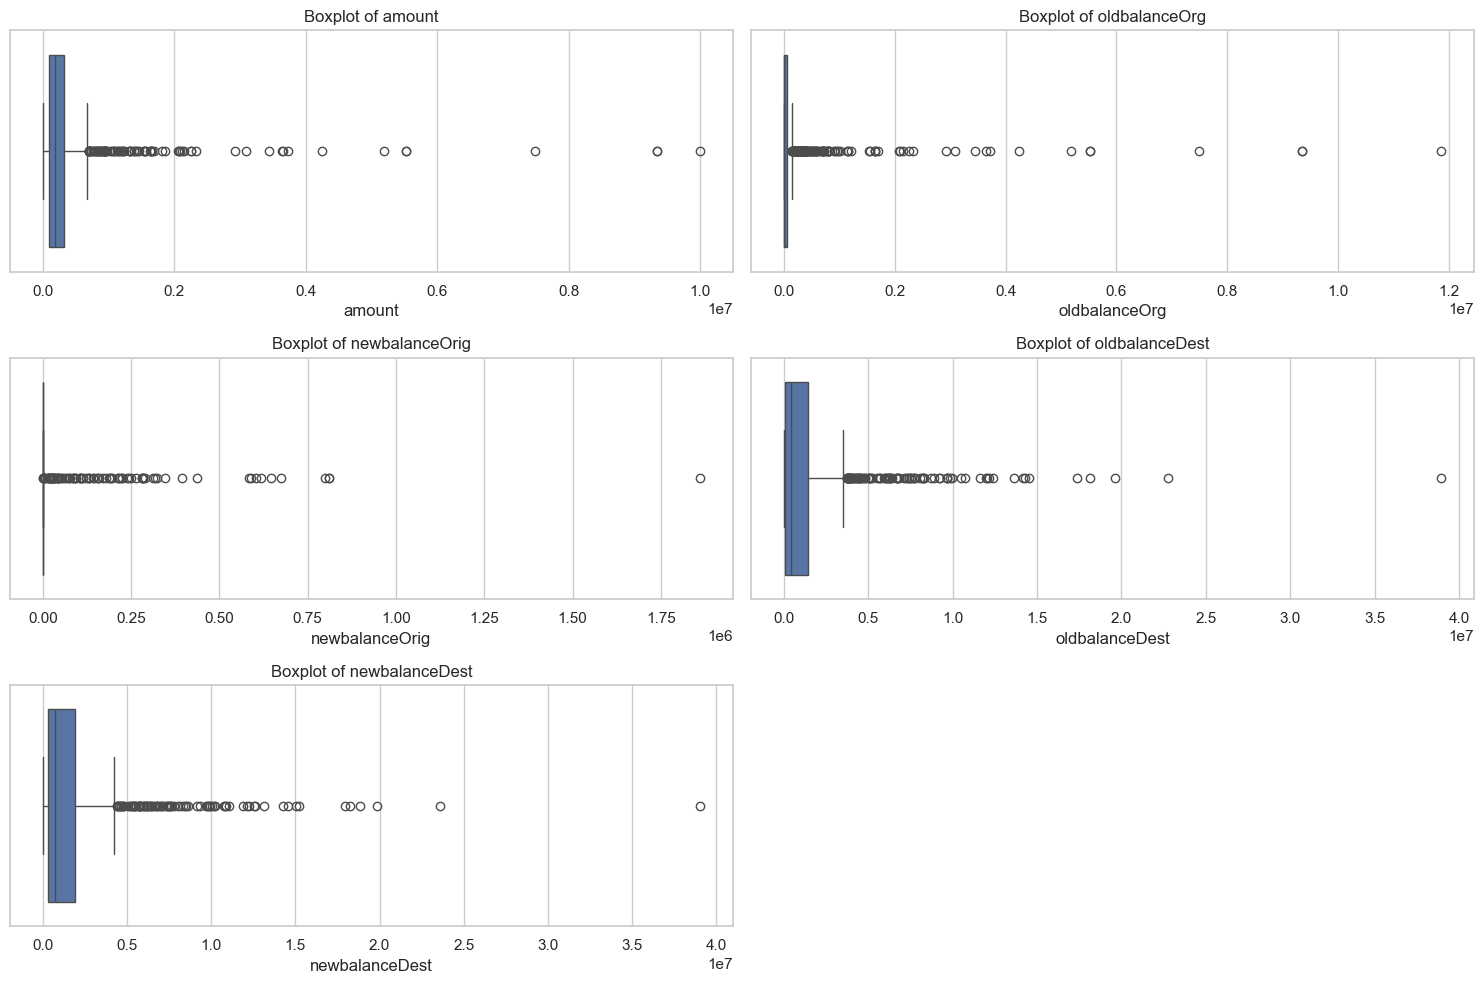

In [83]:
# Visual inspection of boxplots for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [84]:
# === Visualization ===
sns.set(style="whitegrid")

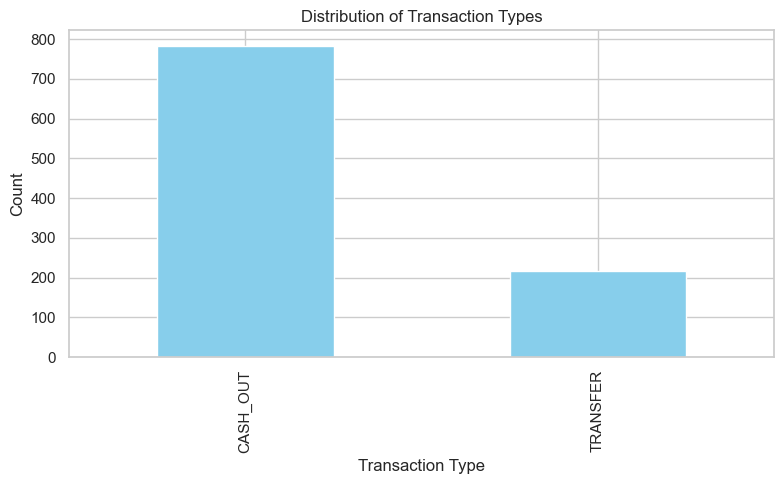

In [85]:
# Distribution of transaction types
plt.figure(figsize=(8, 5))
df_cleaned['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

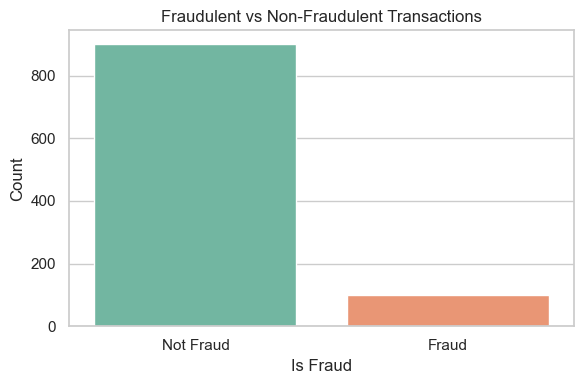

In [86]:
# Class balance: fraud vs non-fraud
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df_cleaned, hue='isFraud', palette='Set2', legend=False)
plt.title("Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

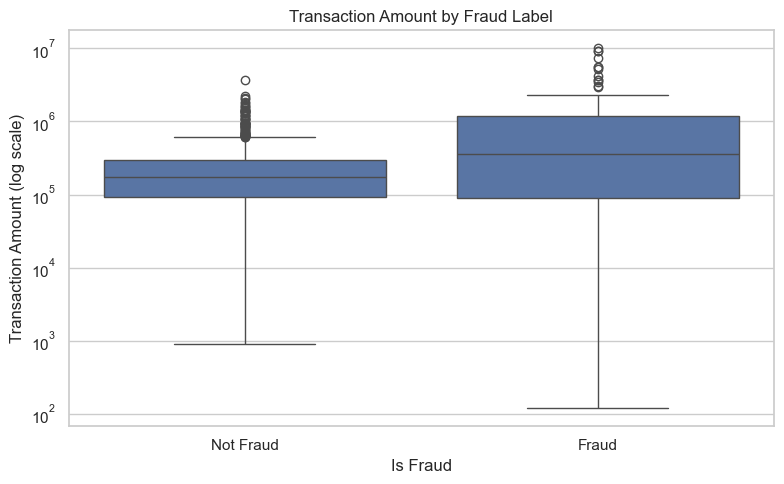

In [87]:
# Log-scaled amount distribution by fraud label
plt.figure(figsize=(8, 5))
sns.boxplot(x='isFraud', y='amount', data=df_cleaned)
plt.yscale("log")
plt.title("Transaction Amount by Fraud Label")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount (log scale)")
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

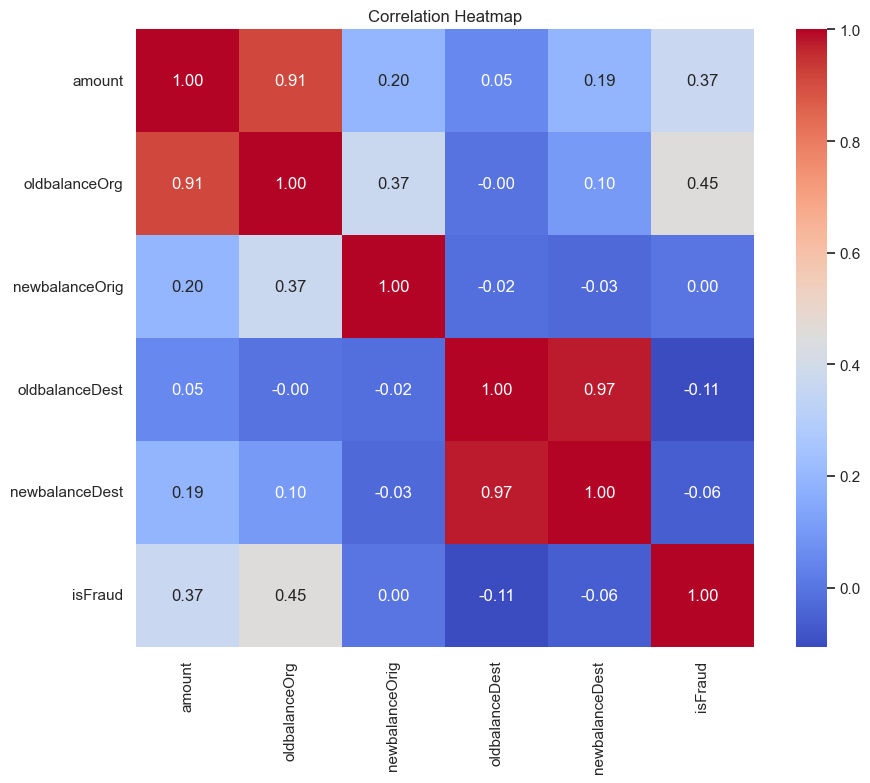

In [88]:
# Correlation matrix and heatmap for feature insights
plt.figure(figsize=(10, 8))
corr_matrix = df_cleaned[numerical_cols + ['isFraud']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [89]:
# === Most Impactful Columns Based on Correlation ===
# Determine strongest predictors of fraud using correlation magnitude
corr_target = corr_matrix['isFraud'].drop('isFraud').abs().sort_values(ascending=False)
print("\nMost impactful columns related to fraud (based on correlation):")
print(corr_target)


Most impactful columns related to fraud (based on correlation):
oldbalanceOrg     0.451799
amount            0.367408
oldbalanceDest    0.106059
newbalanceDest    0.061893
newbalanceOrig    0.001790
Name: isFraud, dtype: float64


In [98]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balance_shift_diff,balanced
0,19,CASH_OUT,156435.77,C1306155018,0.0,0.0,C10389336,350075.23,329337.60,0,20737.63,False
1,9,CASH_OUT,159022.13,C1970395543,100332.0,0.0,C1875625456,0.00,159022.13,0,-58690.13,False
2,35,CASH_OUT,281322.81,C870758580,11308.0,0.0,C1388202553,107819.35,389142.16,0,-270014.81,False
3,38,CASH_OUT,63142.96,C2094408841,0.0,0.0,C221397311,73531.14,136674.10,0,-63142.96,False
4,41,CASH_OUT,370542.50,C730868144,10054.0,0.0,C849704466,281294.97,651837.47,0,-360488.50,False


In [110]:
# === Balance Reconciliation Check ===
# Compare balance deltas without referencing the 'amount' column
# This checks whether the change in sender and receiver balances are equal

df_cleaned['balance_shift_diff'] = (df_cleaned['oldbalanceOrg'] - df_cleaned['newbalanceOrig']) - (df_cleaned['newbalanceDest'] - df_cleaned['oldbalanceDest'])
df_cleaned['balanced'] = df_cleaned['balance_shift_diff'].abs() <= 0.1  # Allow small numerical tolerance

# Print how many transactions are imbalanced
imbalanced_count = (~df_cleaned['balanced']).sum()
print(f"Number of transactions with imbalanced balance shifts: {imbalanced_count} out of {len(df_cleaned)}")

# Check how many of the imbalanced transactions are fraud
imbalanced_frauds = df_cleaned[(~df_cleaned['balanced']) & (df_cleaned['isFraud'] == 1)]
print("Fraudulent transactions among imbalanced rows:")
print(imbalanced_frauds[['type', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balance_shift_diff', 'isFraud']])

Number of transactions with imbalanced balance shifts: 898 out of 1000
Fraudulent transactions among imbalanced rows:
         type  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
54   TRANSFER      387952.42            0.00            0.00            0.00   
55   TRANSFER       38150.22            0.00            0.00            0.00   
57   TRANSFER      696763.08            0.00            0.00        69861.26   
77   TRANSFER     1649818.97            0.00            0.00            0.00   
97   CASH_OUT     2927005.15            0.00            0.00      2994420.07   
98   CASH_OUT     1561891.66            0.00      3471928.95      6443177.56   
138  TRANSFER      404165.06            0.00            0.00            0.00   
140  TRANSFER       85354.69            0.00            0.00            0.00   
158  CASH_OUT     1016540.35            0.00      4463851.64      5700161.74   
200  TRANSFER       44571.94            0.00            0.00            0.00   
22

In [91]:
# === Summary ===
# This notebook completed the Data Wrangling step of Capstone Two:
# - The dataset was successfully loaded, cleaned, and structured.
# - Fraud distribution and variable uniqueness were validated.
# - Outlier detection using IQR revealed strong fraud association in 'amount' and 'oldbalanceOrg'.
# - Data was visualized to support fraud patterns and validate preprocessing.
# - Key predictors were identified for upcoming modeling steps.

# Save cleaned data for next phase
df_cleaned.to_csv("../data/sentinel_cleaned_sample_1000.csv", index=False)
print("\nCleaned dataset saved as '../data/sentinel_cleaned_sample_1000.csv'")


Cleaned dataset saved as '../data/sentinel_cleaned_sample_1000.csv'
